# Algoritmo genético para el problema TSP gr202

In [1]:
import pickle
import os
from distance_table import DistanceTable
import random
import matplotlib.pyplot as plt
from matplotlib import animation

In [2]:
# Lo primero es cargar cargar el archivo que contiene los nodos y sus posiciones.

file_path = '../data/input/gr202.tsp'
fileName = "gr202" 
clean_lines = []
try:
    with open(file_path, 'r') as file:
        lines = file.readlines()
        for line in lines:
            clean_lines.append(line.strip())
            print(line.strip()) # .strip() removes leading/trailing whitespace, including newline characters
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

NAME: gr202
TYPE: TSP
COMMENT: Europe-Subproblem of 666-city TSP (Groetschel)
DIMENSION: 202
EDGE_WEIGHT_TYPE: GEO
DISPLAY_DATA_TYPE: COORD_DISPLAY
NODE_COORD_SECTION
1 37.44 -25.40
2 38.43 -9.08
3 41.11 -8.36
4 37.23 -5.59
5 36.32 -6.18
6 36.43 -4.25
7 37.13 -3.41
8 37.53 -4.46
9 38.21 -0.29
10 39.28 -0.22
11 41.23 2.11
12 41.38 -0.53
13 40.24 -3.41
14 41.39 -4.43
15 43.15 -2.58
16 43.22 -8.23
17 38.54 1.26
18 39.34 2.39
19 42.30 1.31
20 44.50 -0.34
21 43.36 1.26
22 43.18 5.24
23 43.42 7.15
24 43.42 7.23
25 42.42 9.27
26 45.50 1.16
27 45.26 4.24
28 45.45 4.51
29 45.10 5.43
30 48.24 -4.29
31 48.05 -1.41
32 47.13 -1.33
33 47.23 0.41
34 49.30 0.08
35 48.52 2.20
36 49.15 4.02
37 47.19 5.01
38 48.41 6.12
39 48.35 7.45
40 49.36 6.09
41 50.38 5.34
42 50.50 4.20
43 50.38 3.04
44 51.03 3.43
45 51.13 4.25
46 51.26 5.28
47 51.55 4.28
48 52.22 4.54
49 52.05 5.08
50 53.13 6.33
51 50.23 -4.10
52 50.43 -1.54
53 50.50 -0.08
54 51.29 -3.13
55 51.27 -2.35
56 51.30 -0.10
57 52.30 -1.50
58 53.25 -2.55
59

In [3]:
# ahora para que sea más fácil el procesamiento y los cálculos del algoritmo
# primero es mejor hacer una matriz donde se guarda la distancia entre todos los puntos
# de tal forma que la intersección entre 2 nodos sea su distancia.  

# seleccionar solo los nodos del archivo
nodes = clean_lines[7:]
nodes = nodes[:-1]  
print(nodes)


['1 37.44 -25.40', '2 38.43 -9.08', '3 41.11 -8.36', '4 37.23 -5.59', '5 36.32 -6.18', '6 36.43 -4.25', '7 37.13 -3.41', '8 37.53 -4.46', '9 38.21 -0.29', '10 39.28 -0.22', '11 41.23 2.11', '12 41.38 -0.53', '13 40.24 -3.41', '14 41.39 -4.43', '15 43.15 -2.58', '16 43.22 -8.23', '17 38.54 1.26', '18 39.34 2.39', '19 42.30 1.31', '20 44.50 -0.34', '21 43.36 1.26', '22 43.18 5.24', '23 43.42 7.15', '24 43.42 7.23', '25 42.42 9.27', '26 45.50 1.16', '27 45.26 4.24', '28 45.45 4.51', '29 45.10 5.43', '30 48.24 -4.29', '31 48.05 -1.41', '32 47.13 -1.33', '33 47.23 0.41', '34 49.30 0.08', '35 48.52 2.20', '36 49.15 4.02', '37 47.19 5.01', '38 48.41 6.12', '39 48.35 7.45', '40 49.36 6.09', '41 50.38 5.34', '42 50.50 4.20', '43 50.38 3.04', '44 51.03 3.43', '45 51.13 4.25', '46 51.26 5.28', '47 51.55 4.28', '48 52.22 4.54', '49 52.05 5.08', '50 53.13 6.33', '51 50.23 -4.10', '52 50.43 -1.54', '53 50.50 -0.08', '54 51.29 -3.13', '55 51.27 -2.35', '56 51.30 -0.10', '57 52.30 -1.50', '58 53.25 -2

In [4]:
# ahora crear la distance table en base a la lista de nodos la traemos de un archivo guardado si existe o sino 
# se instancia de nuevo

def load_or_create_distance_table(nodes, cache_file=f'data/output/tables/distance_table_{fileName}.pkl'):
    os.makedirs(os.path.dirname(cache_file), exist_ok=True)
    if os.path.exists(cache_file):
        print(f"Cargando matriz de distancias desde {cache_file}")
        with open(cache_file, 'rb') as f:
            return pickle.load(f)
    else:
        print("Calculando matriz de distancias")
        distance_table = DistanceTable(nodes)
        print(f"Guardando matriz en {cache_file} para uso futuro")
        with open(cache_file, 'wb') as f:
            pickle.dump(distance_table, f)
        return distance_table

In [5]:
distance_table = load_or_create_distance_table(nodes)

nodes = distance_table.nodes

print("Cantidad de nodos: ", len(nodes))
for node in nodes:
    print(node)

Cargando matriz de distancias desde data/output/tables/distance_table_gr202.pkl
Cantidad de nodos:  202
(1, 37.44, -25.4)
(2, 38.43, -9.08)
(3, 41.11, -8.36)
(4, 37.23, -5.59)
(5, 36.32, -6.18)
(6, 36.43, -4.25)
(7, 37.13, -3.41)
(8, 37.53, -4.46)
(9, 38.21, -0.29)
(10, 39.28, -0.22)
(11, 41.23, 2.11)
(12, 41.38, -0.53)
(13, 40.24, -3.41)
(14, 41.39, -4.43)
(15, 43.15, -2.58)
(16, 43.22, -8.23)
(17, 38.54, 1.26)
(18, 39.34, 2.39)
(19, 42.3, 1.31)
(20, 44.5, -0.34)
(21, 43.36, 1.26)
(22, 43.18, 5.24)
(23, 43.42, 7.15)
(24, 43.42, 7.23)
(25, 42.42, 9.27)
(26, 45.5, 1.16)
(27, 45.26, 4.24)
(28, 45.45, 4.51)
(29, 45.1, 5.43)
(30, 48.24, -4.29)
(31, 48.05, -1.41)
(32, 47.13, -1.33)
(33, 47.23, 0.41)
(34, 49.3, 0.08)
(35, 48.52, 2.2)
(36, 49.15, 4.02)
(37, 47.19, 5.01)
(38, 48.41, 6.12)
(39, 48.35, 7.45)
(40, 49.36, 6.09)
(41, 50.38, 5.34)
(42, 50.5, 4.2)
(43, 50.38, 3.04)
(44, 51.03, 3.43)
(45, 51.13, 4.25)
(46, 51.26, 5.28)
(47, 51.55, 4.28)
(48, 52.22, 4.54)
(49, 52.05, 5.08)
(50, 53.13, 

# Algoritmo genético

In [6]:
#HELPERS

def route_distance(route, distance_table):
    dist = 0
    for i in range(len(route)):
        dist += distance_table.get_distance_by_index(route[i], route[(i+1) % len(route)])
    return dist

def fitness(route, distance_table):
    return 1 / route_distance(route, distance_table)


def initial_population(N, num_nodes):
    population = []
    for _ in range(N):
        route = list(range(num_nodes))
        random.shuffle(route)
        population.append(route)
    return population


def tournament_selection(population, distance_table, k=5):
    selected = random.sample(population, k)
    selected.sort(key=lambda r: route_distance(r, distance_table))
    return selected[0]


def order_crossover(parent1, parent2):
    n = len(parent1)
    start, end = sorted(random.sample(range(n), 2))
    
    child = [-1] * n
    child[start:end] = parent1[start:end]
    
    pos = end
    for gene in parent2:
        if gene not in child:
            if pos >= n: pos = 0
            child[pos] = gene
            pos += 1
    return child


def swap_mutation(route):
    r = route[:]
    i, j = random.sample(range(len(route)), 2)
    r[i], r[j] = r[j], r[i]
    return r

def inversion_mutation(route):
    r = route[:]
    i, j = sorted(random.sample(range(len(route)), 2))
    r[i:j] = reversed(r[i:j])
    return r


In [7]:
def genetic_algorithm(distance_table, N=200, maxIter=1000,
                      p_survivors=0.2, p_crossover=0.7, p_mutation=0.1,
                      visualize=True, save_gif=True, gif_name="tsp_evolution.gif"):
    
    num_nodes = len(distance_table.nodes)
    population = initial_population(N, num_nodes)
    
    best_route = None
    best_dist = float("inf")
    
    distance_history = []
    route_history = []
    
    for gen in range(maxIter):
        population.sort(key=lambda r: route_distance(r, distance_table))
        current_best = population[0]
        current_dist = route_distance(current_best, distance_table)
        
        if current_dist < best_dist:
            best_route, best_dist = current_best, current_dist
        
        distance_history.append(best_dist)
        
        if gen % 20 == 0:
            route_history.append((gen, best_route[:], best_dist))
        
        survivors = population[:int(p_survivors * N)]
        children = []
        for _ in range(int(p_crossover * N)):
            p1, p2 = tournament_selection(population, distance_table), tournament_selection(population, distance_table)
            child = order_crossover(p1, p2)
            children.append(child)
        
        mutants = []
        for _ in range(int(p_mutation * N)):
            r = random.choice(population)
            if random.random() < 0.5:
                mutants.append(swap_mutation(r))
            else:
                mutants.append(inversion_mutation(r))
        
        population = survivors + children + mutants

        uniq = []
        seen = set()
        for r in population:
            t = tuple(r)
            if t not in seen:
                seen.add(t)
                uniq.append(r)
        population = uniq


        while len(population) < N:
            immigrant = list(range(num_nodes))
            random.shuffle(immigrant)
            population.append(immigrant)

        if len(population) > N:
            population.sort(key=lambda r: route_distance(r, distance_table))
            population = population[:N]
                                                
    if visualize:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
        
        nodes = distance_table.nodes
        x = [nodes[i][1] for i in best_route] + [nodes[best_route[0]][1]]
        y = [nodes[i][2] for i in best_route] + [nodes[best_route[0]][2]]
        ax1.plot(x, y, 'b-', marker='o')
        ax1.set_title(f"Mejor Ruta - Distancia: {best_dist:.2f}")
        ax1.set_xlabel("X")
        ax1.set_ylabel("Y")
        
        ax2.plot(range(len(distance_history)), distance_history, 'r-', label="Distancia")
        ax2.set_title("Evolución de la Distancia")
        ax2.set_xlabel("Generaciones")
        ax2.set_ylabel("Distancia")
        ax2.legend()
        
        plt.show()
    
    if save_gif and route_history:
        fig, ax = plt.subplots(figsize=(6,6))
        
        def update(frame):
            ax.clear()
            gen, route, dist = route_history[frame]
            x = [nodes[i][1] for i in route] + [nodes[route[0]][1]]
            y = [nodes[i][2] for i in route] + [nodes[route[0]][2]]
            ax.plot(x, y, 'b-', marker='o')
            ax.set_title(f"Gen {gen} - Distancia: {dist:.2f}")
            ax.set_xlabel("X")
            ax.set_ylabel("Y")
        
        ani = animation.FuncAnimation(fig, update, frames=len(route_history), interval=300, repeat=False)
        ani.save(gif_name, writer='pillow')
        print(f"GIF guardado como {gif_name}")
    
    return best_route, best_dist


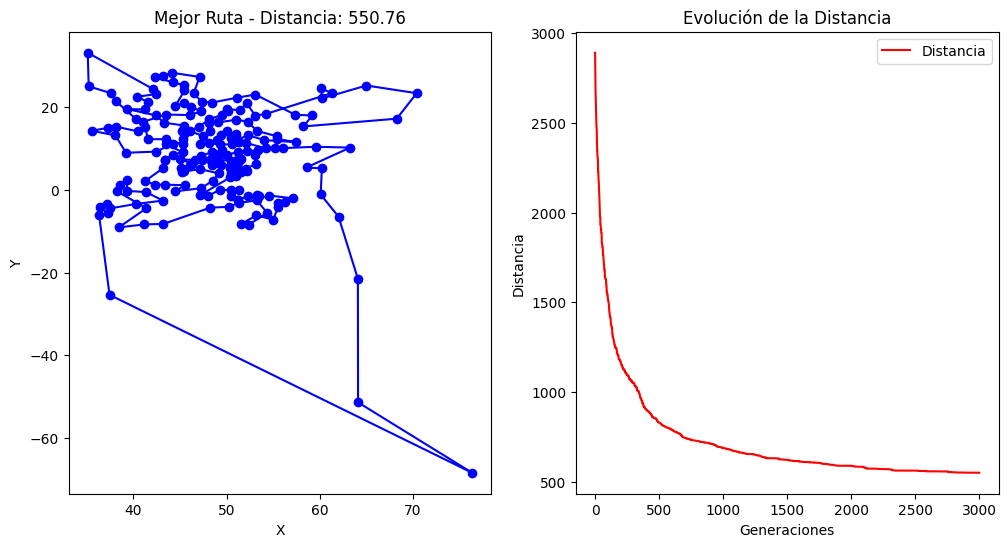

GIF guardado como tsp_gr202.gif


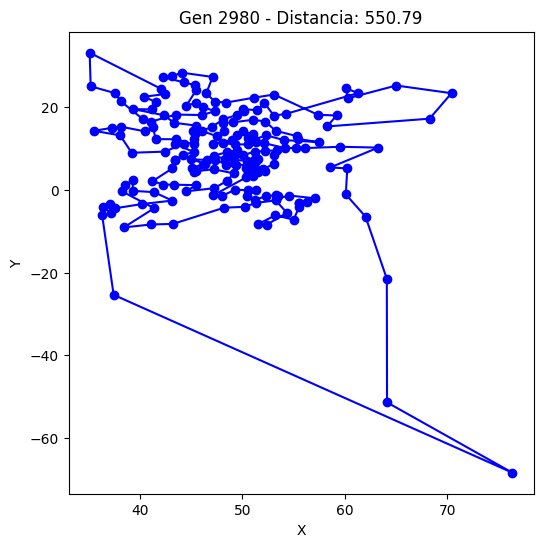

In [8]:
best_route, best_dist = genetic_algorithm(distance_table,
                                          N=300,
                                          maxIter=3000,
                                          p_survivors=0.2,
                                          p_crossover=0.7,
                                          p_mutation=0.1,
                                          visualize=True,
                                          save_gif=True,
                                          gif_name="tsp_gr202.gif")


In [9]:
print("Mejor ruta encontrada:", best_route)
print("Distancia total:", best_dist)

Mejor ruta encontrada: [54, 51, 55, 52, 33, 30, 31, 42, 43, 46, 44, 41, 40, 45, 47, 48, 49, 94, 95, 99, 111, 118, 122, 119, 120, 123, 130, 38, 103, 107, 108, 109, 98, 110, 106, 105, 104, 102, 39, 117, 37, 129, 128, 136, 127, 126, 28, 26, 27, 36, 35, 34, 32, 19, 25, 20, 18, 10, 21, 22, 23, 141, 137, 143, 142, 24, 145, 153, 154, 152, 151, 147, 148, 146, 144, 138, 139, 140, 184, 185, 186, 189, 196, 191, 190, 197, 192, 193, 201, 200, 199, 198, 150, 149, 187, 174, 172, 175, 176, 188, 179, 180, 181, 195, 194, 182, 178, 177, 173, 171, 165, 161, 90, 89, 88, 77, 76, 78, 80, 81, 79, 156, 157, 160, 159, 164, 163, 168, 170, 135, 183, 132, 133, 134, 169, 162, 158, 155, 87, 93, 86, 97, 101, 114, 115, 116, 167, 166, 124, 131, 125, 121, 112, 113, 100, 96, 92, 91, 85, 82, 84, 83, 66, 67, 73, 74, 75, 0, 4, 3, 5, 6, 7, 12, 14, 11, 9, 17, 16, 8, 13, 1, 2, 15, 29, 50, 53, 57, 71, 69, 68, 70, 72, 63, 62, 64, 65, 61, 58, 60, 59, 56]
Distancia total: 550.7557145574086


In [10]:
def load_nodes_from_tsp(path):
    with open(path, 'r') as f:
        lines = f.readlines()
    node_lines = []
    read = False
    for line in lines:
        line = line.strip()
        if line == "NODE_COORD_SECTION":
            read = True
            continue
        if line == "EOF":
            break
        if read:
            node_lines.append(line)
    return node_lines


In [11]:
import matplotlib.pyplot as plt

def plot_tour(tour, distance_table, title="Ruta óptima"):
    nodes = distance_table.nodes  # lista de (id, x, y)
    # Ojo: en TSPLIB los nodos empiezan en 1
    x = [nodes[i-1][1] for i in tour] + [nodes[tour[0]-1][1]]
    y = [nodes[i-1][2] for i in tour] + [nodes[tour[0]-1][2]]

    plt.figure(figsize=(8,8))
    plt.plot(x, y, 'bo-')
    for idx, (node_id, nx, ny) in enumerate(nodes):
        plt.text(nx, ny, str(node_id), fontsize=8, color="red")
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()


In [12]:
def parse_tsplib_tour(path):
    tour = []
    with open(path, "r") as f:
        read = False
        for line in f:
            line = line.strip()
            if line == "TOUR_SECTION":
                read = True
                continue
            if line in ("-1", "EOF"):
                break
            if read and line:
                tour.append(int(line))
    return tour


In [13]:
tour = parse_tsplib_tour("../data/expected/gr202.opt.tour")

print("Nodos en el tour (primeros 10):", tour[:10])
print("Cantidad de nodos en tour:", len(tour))


Nodos en el tour (primeros 10): [1, 3, 16, 14, 13, 12, 15, 20, 26, 33]
Cantidad de nodos en tour: 202


In [14]:
def compute_tour_length(tour, distance_table: DistanceTable):
    total = 0.0
    for i in range(len(tour)):
        j = (i + 1) % len(tour)
        total += distance_table.get_distance_between_nodes(tour[i], tour[j])
    return total

In [15]:
best_dist = compute_tour_length(tour, distance_table)

print("Distancia óptima:", best_dist)

Distancia óptima: 549.9980703917479


In [16]:
import matplotlib.pyplot as plt

def plot_tour(tour, distance_table, title="Ruta"):
    nodes = distance_table.nodes
    x = [nodes[i-1][1] for i in tour] + [nodes[tour[0]-1][1]]
    y = [nodes[i-1][2] for i in tour] + [nodes[tour[0]-1][2]]

    plt.figure(figsize=(8,8))
    plt.plot(x, y, 'bo-')
    for node_id, nx, ny in nodes:
        plt.text(nx, ny, str(node_id), fontsize=7, color="red")
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()


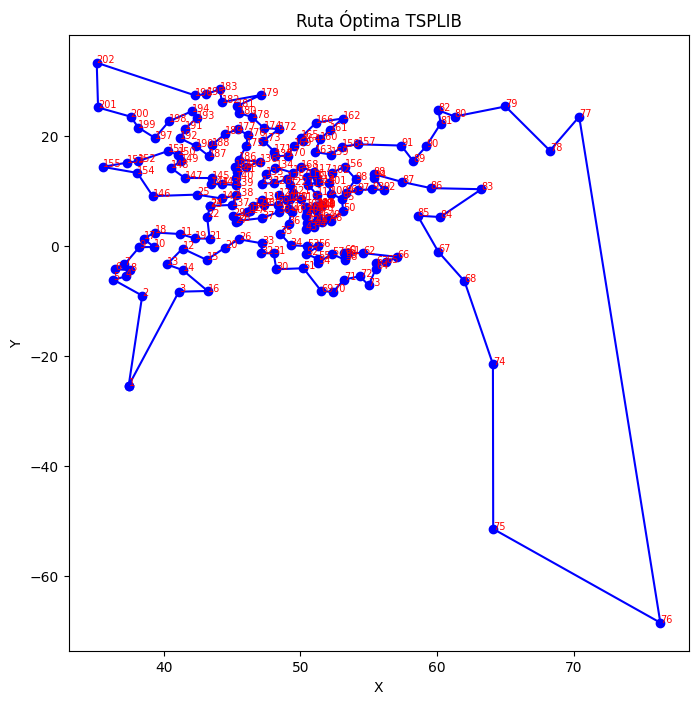

In [17]:
plot_tour(tour, distance_table, "Ruta Óptima TSPLIB")